##I. Perkenalan
Nama: Hafidz Muta'ali

Batch: FTDS 006

Tujuan: mendeteksi edge suatu gambar dan melakukan operasi perkalian matriks.


---
Metode: 


*   Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus $\frac{\partial I}{\partial x}$ dan $\frac{\partial I}{\partial y}$
* Hitung gradient magnitude tiap pixel dengan rumus $mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}$
Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi (Biasanya threshold ~ 30)





## II. Import Pustaka

In [6]:
from PIL import Image 
import numpy as np
import sympy as sy
import requests
import matplotlib.pyplot as plt

## III. Data Loading

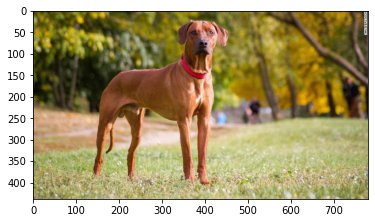

In [36]:
url='https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg'
img = Image.open(requests.get(url, stream=True).raw)
plt.imshow(img)

## IV. Data Preprocessing

Shape : (438, 780)


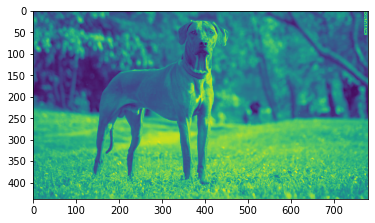

In [37]:
#Mengubah gambar menjadi greyscale
img2=img.convert('L')
plt.imshow(img2)
#Mengubah gambar menjadi Array
img2=np.asarray(img2)
#Melihat bentuk gambar
print('Shape :',img2.shape)

In [29]:
#MHitung vektor gradien untuk masing-masing sumbu x dan y 
idx,idy=np.gradient(img2)

In [30]:
idx

array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
       [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
       [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
       ...,
       [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
       [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
       [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]])

In [31]:
idy

array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
       [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
       [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
       ...,
       [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
       [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
       [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])

## V. Image Processing

In [43]:
# Menghitung gradient magnitude tiap pixel 
magnitude = np.sqrt((idx**2)+(idy**2))
magnitude

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

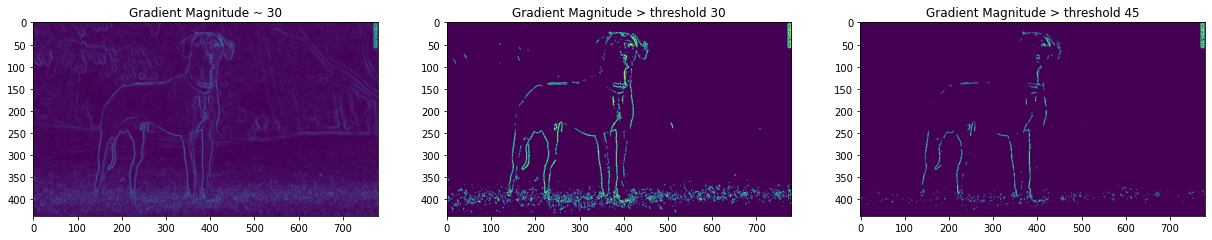

In [69]:
#Perbandingan Nilai Threshold 
fig, ax =plt.subplots(ncols=3,figsize=(21,5))
ax[0].set_title("Gradient Magnitude ~ 30")
ax[0].imshow(magnitude)
ax[1].set_title("Gradient Magnitude > threshold 30")
ax[1].imshow(np.where(magnitude > 30, 1, 0))
ax[2].set_title("Gradient Magnitude > threshold 45")
ax[2].imshow(np.where(magnitude > 45, 1, 0))

#VI. Hasil dan kesimpulan



---
Semakin besar nilai trheshold maka deteksi tepi(edge) lebih jelas, tetapi jika terlalu besar edge dan background seperti menyatu dan tidak terlihat lagi 
